<a href="https://colab.research.google.com/github/VaibhaVSharmaVvs/Promotion-Prediction/blob/main/Promotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/employee_promotion.csv")

In [ ]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
data.count()

employee_id             54808
department              54808
region                  54808
education               52399
gender                  54808
recruitment_channel     54808
no_of_trainings         54808
age                     54808
previous_year_rating    50684
length_of_service       54808
awards_won              54808
avg_training_score      52248
is_promoted             54808
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
data[data["education"].isnull() | data["previous_year_rating"].isnull() | data["avg_training_score"].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,77.0,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57.0,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,70.0,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,44.0,0
31,58536,Finance,region_31,Bachelor's,m,other,2,26,1.0,2,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,47.0,0
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,0,NaN,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,0,NaN,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,78.0,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(46380, 13)

In [ ]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,46380.000000,46380.000000,46380.000000,46380.00000,46380.000000,46380.000000,46380.000000,46380.000000
mean,39191.504248,1.254506,35.572402,3.33232,6.307956,0.023502,63.927577,0.087775
std,22644.419549,0.607985,7.526501,1.25897,4.202143,0.151492,13.425576,0.282970
min,1.000000,1.000000,20.000000,1.00000,1.000000,0.000000,39.000000,0.000000
25%,19582.750000,1.000000,30.000000,3.00000,3.000000,0.000000,51.000000,0.000000
50%,39169.500000,1.000000,34.000000,3.00000,5.000000,0.000000,60.000000,0.000000
75%,58858.250000,1.000000,39.000000,4.00000,8.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.00000,37.000000,1.000000,99.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46380 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           46380 non-null  int64  
 1   department            46380 non-null  object 
 2   region                46380 non-null  object 
 3   education             46380 non-null  object 
 4   gender                46380 non-null  object 
 5   recruitment_channel   46380 non-null  object 
 6   no_of_trainings       46380 non-null  int64  
 7   age                   46380 non-null  int64  
 8   previous_year_rating  46380 non-null  float64
 9   length_of_service     46380 non-null  int64  
 10  awards_won            46380 non-null  int64  
 11  avg_training_score    46380 non-null  float64
 12  is_promoted           46380 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.0+ MB


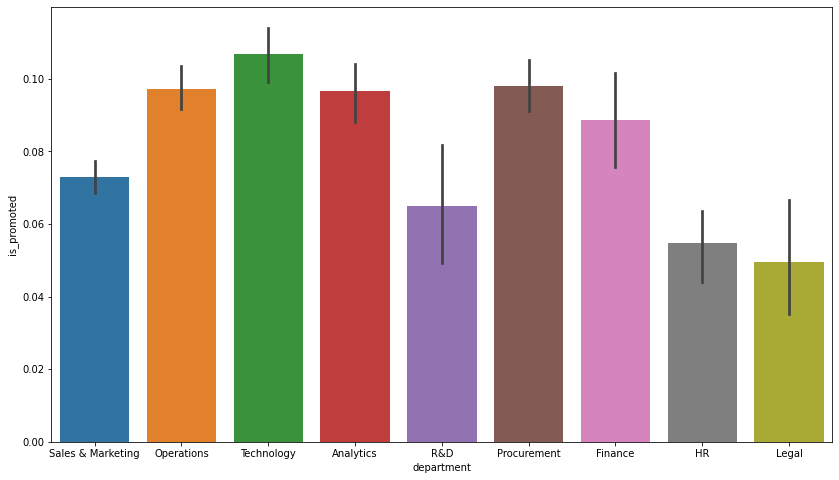

In [ ]:
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='department',y='is_promoted', ax=ax,data=data)

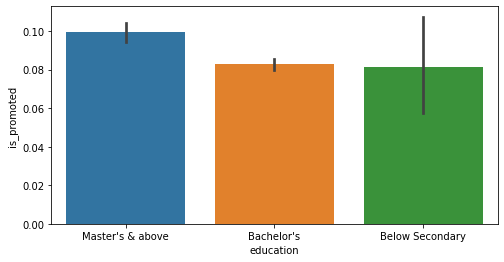

In [ ]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='education',y='is_promoted', ax=ax,data=data)

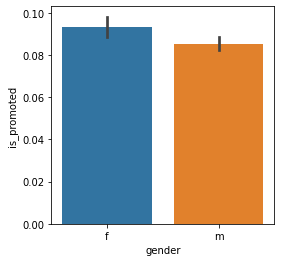

In [ ]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='gender',y='is_promoted', ax=ax,data=data)

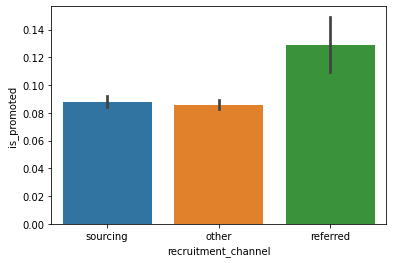

In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='recruitment_channel',y='is_promoted', ax=ax,data=data)

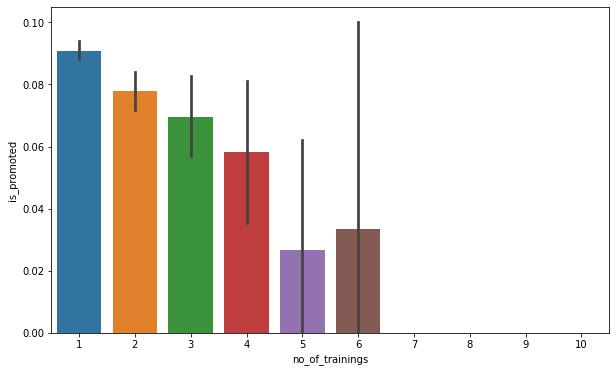

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='no_of_trainings',y='is_promoted', ax=ax,data=data)

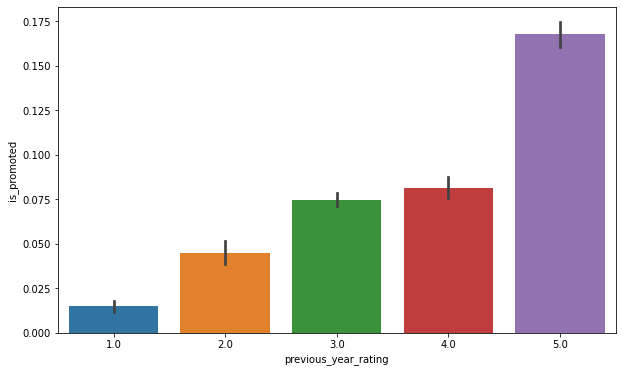

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='previous_year_rating', y='is_promoted', data=data)

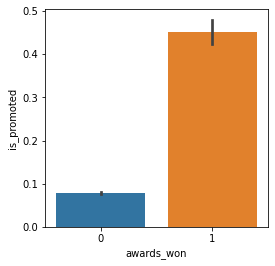

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='awards_won', y='is_promoted', data=data);

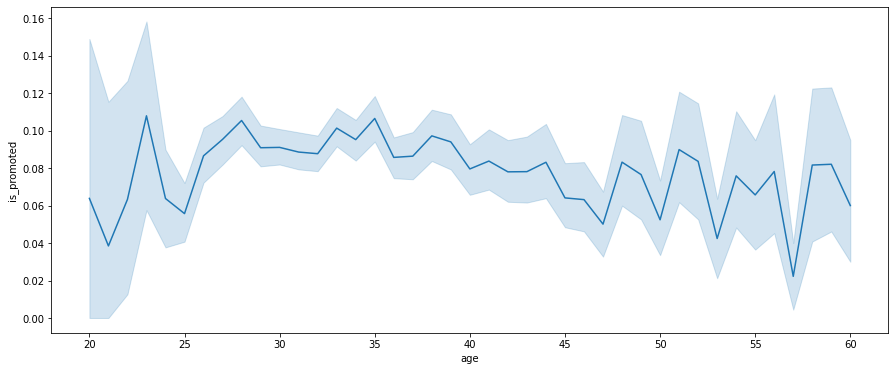

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data, x='age', y='is_promoted')

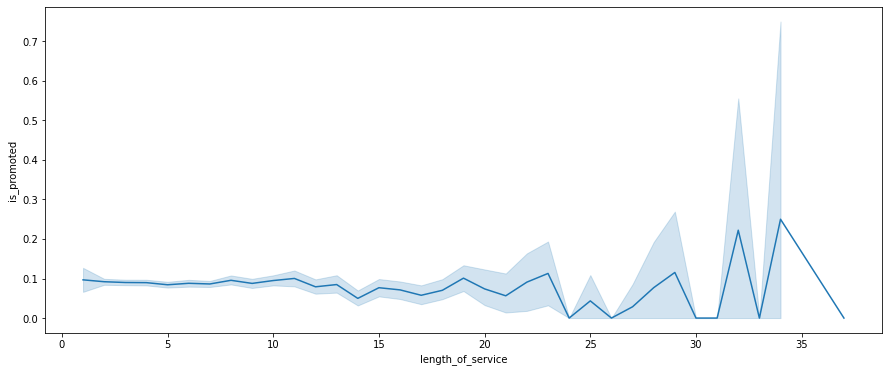

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data, x='length_of_service', y='is_promoted');

In [ ]:
data.drop(["employee_id"],axis=1,inplace=True)

In [ ]:
Edu = {'Master\'s & above': 2, 'Bachelor\'s': 1, 'Below Secondary': 0}
data['education'] = data['education'].map(Edu)

In [ ]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,2,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,1,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,1,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,1,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,1,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
categorical_cols = ['department', 'gender', 'recruitment_channel'] 

data = pd.get_dummies(data, columns = categorical_cols)

In [ ]:
data.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,region_7,2,1,35,5.0,8,0,49.0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,region_22,1,1,30,5.0,4,0,60.0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,region_19,1,1,34,3.0,7,0,50.0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,region_23,1,2,39,1.0,10,0,50.0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,region_26,1,1,45,3.0,2,0,73.0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [ ]:
data.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
gender_f                        0
gender_m                        0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

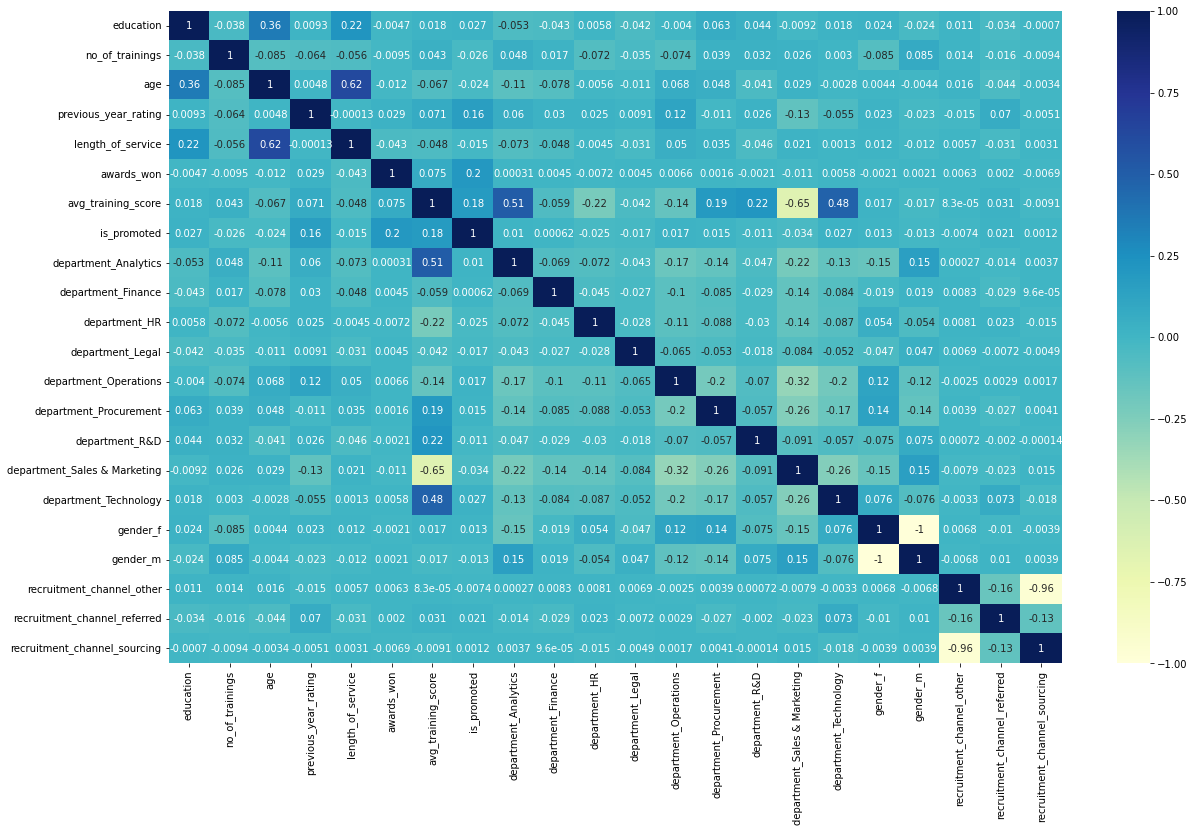

In [ ]:
correlations = data.corr()

indx=correlations.index
plt.figure(figsize=(20,12))
sns.heatmap(data[indx].corr(),annot=True,cmap="YlGnBu")

In [ ]:
x = data.drop(['is_promoted','region','gender_f',],axis=1)
x

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,35,5.0,8,0,49.0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,30,5.0,4,0,60.0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,1,1,34,3.0,7,0,50.0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,1,2,39,1.0,10,0,50.0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,1,1,45,3.0,2,0,73.0,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,1,2,31,1.0,2,0,49.0,0,0,0,0,0,0,0,1,0,1,1,0,0
54803,1,1,48,3.0,17,0,78.0,0,0,0,0,0,0,0,0,1,1,0,0,1
54804,2,1,37,2.0,6,0,56.0,0,0,0,0,1,0,0,0,0,0,1,0,0
54805,1,1,27,5.0,3,0,79.0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
y=data['is_promoted']
y

0        0
1        0
2        0
3        0
4        0
        ..
54802    0
54803    0
54804    0
54805    0
54807    0
Name: is_promoted, Length: 46380, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.18, random_state=0)

In [ ]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))
print('XGBoost Accuracy: ', accuracy_score(y_test, preds)*100)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7611
           1       0.97      0.32      0.48       738

    accuracy                           0.94      8349
   macro avg       0.96      0.66      0.72      8349
weighted avg       0.94      0.94      0.92      8349

XGBoost Accuracy:  93.87950652772787


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=0)
gnb = GaussianNB()
y_preds = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_preds).sum()))

Number of mislabeled points out of a total 8349 points : 893


In [ ]:
print(classification_report(y_test, y_preds))
print('Accuracy: ', accuracy_score(y_test, y_preds)*100)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7611
           1       0.30      0.16      0.21       738

    accuracy                           0.89      8349
   macro avg       0.61      0.56      0.58      8349
weighted avg       0.87      0.89      0.88      8349

Accuracy:  89.3041082764403


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7611
           1       1.00      0.14      0.24       738

    accuracy                           0.92      8349
   macro avg       0.96      0.57      0.60      8349
weighted avg       0.93      0.92      0.90      8349

Accuracy:  92.35836627140975


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_predict = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
print('Accuracy: ', accuracy_score(y_test, y_predict)*100)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7611
           1       0.89      0.29      0.44       738

    accuracy                           0.93      8349
   macro avg       0.92      0.64      0.70      8349
weighted avg       0.93      0.93      0.92      8349

Accuracy:  93.41238471673255


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred2 = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))
print('Accuracy: ', accuracy_score(y_test, y_pred2)*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7611
           1       0.94      0.16      0.28       738

    accuracy                           0.93      8349
   macro avg       0.93      0.58      0.62      8349
weighted avg       0.93      0.93      0.90      8349

Accuracy:  92.50209605940832
